<div style="width: 50%; float: left">
    <img src="../ups2.png" width="217" align="center">
    <br>
    <strong>CARRERA: </strong> Computación
    <br>
    <strong>EXAMEN: </strong>1
    <br>
    <strong>ESTUDIANTE: </strong>Doménica Merchán García
    <br>
</div>
<div style="width: 50%; float: left">
    <br>
    <strong align="center">EXAMEN PRÁCTICO</strong>
    <br>
    <br>
    <br>
    <strong>ASIGNATURA: </strong>Simulación
    <br>
    <strong>TÍTULO: </strong>Examen Práctico de Interciclo
    <br>
    <br>
    <br>
</div>
<strong><center>ACTIVIDADES DESARROLLADAS</center></strong>

Primero se cargan las librerías necesarias para la ejecución de todo el programa

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from collections import Counter
from nltk.corpus import stopwords
from sklearn.metrics import mean_squared_error, mean_absolute_error

Para la primera parte se pide realizar el análisis de las redes sociales del alcual presidente. En este caso se realizará el análisis de sus tweets en su cuenta oficial de Twitter https://twitter.com/LassoGuillermo. Para la extracción de la información se utilizó la herramienta Octaparse, que permite hacer web scraping de forma automática. Los datos recolectados se guardaron en el archivo Data.csv, y corresponden a:

- El usuario que realiza la publicación
- La Fecha en la que se realiza la publicación
- El texto del tweet publicado
- El número de comentarios
- El número de veces que la publicación fue compartida
- El número de likes

Como primer paso se procede a aplicar técnicas Deprocesamiento de Lenguaje Natural (NPL) en la columna de los Tweets. En primer lugar se procede a eliminar información innecesaria como signos de puntuación (.,:) y saltos de línea (\n). Posteriormente se convierte todo el texto a minúsculas (Lowercase).

Luego se realiza un análisis de la información para obtener nuevos datos de interés como:

- El número de palabras que contiene la publicación
- La cantidad de etiquetas en la publicación
- El número de HashTags usados en la publicación

Y finalmente se ordena la información obtenida en base al número de "Likes" de cada publicación (de menor a mayor).

In [2]:
df = pd.read_csv('Data.csv')
df['Tweet'] = [str(tweet).strip().replace('.', '').replace(':', '').replace('\n', '') for tweet in df['Tweet']]
df['Tweet'] = df['Tweet'].str.lower()
df['Comment'] = [comment.replace('.','').replace('K','')+'00' if '.' in comment else comment.replace('K','')+'000' if 'K' in comment else comment for comment in df['Comment']]
df['Share'] = [share.replace('.','').replace('K','')+'00' if '.' in share else share.replace('K','')+'000' if 'K' in share else share for share in df['Share']]
df['Like'] = [like.replace('.','').replace('K','')+'00' if '.' in like else like.replace('K','')+'000' if 'K' in like else like for like in df['Like']]
df['Like'] = df['Like'].apply(pd.to_numeric)
df['#Words'] = [len(str(tweet).split(' ')) for tweet in df['Tweet']]
df['#HashTags'] = [len(str(tweet).split('#'))-1 for tweet in df['Tweet']]
df['#Tags'] = [len(str(tweet).split('@'))-1 for tweet in df['Tweet']]

df = df.sort_values(by=['Like']).reset_index(drop=True)

Otro dato interesante se obtiene a través del análisis de palabras utilizadas en cada Tweet. Por medio de la librería NLTK, que permite realizar NPL, se consigue una lista de las palabras más frecuentes utilizadas en todas las publicaciones. Para ello se omiten las Stopwords, que son palabras que carecen de información relevante, sin embargo tienden a repetirse más en la oración como los artículos (él, la, ellos). Una vez que se obtiene la lista de palabras más frecuentes se agrega una nueva columna al DataSet con la cantidad de veces que la publicación ha usado las palabras de esta lista.

In [3]:
tweets = [word for word in " ".join(df["Tweet"]).split() if word not in stopwords.words('spanish')]
words = Counter(tweets).most_common(20)
freq = [i[0] for i in words]
Frequency = [len([i for i in freq if i in tweet]) for tweet in df['Tweet']]
df['Frequency'] = Frequency
df.head(15)

User    Date  \
0                  Guillermo Lasso  10-Mar   
1                      AsíAmaneció   8-Mar   
2   Red de Periodistas Libres #RPL   9-Mar   
3          Movimiento CREO Ecuador   9-Feb   
4                  Guillermo Lasso  11-Mar   
5                    Josué Sanchez   4-Feb   
6                  Guillermo Lasso   9-Mar   
7                  Guillermo Lasso  23-Feb   
8                  Guillermo Lasso  11-Mar   
9                  Guillermo Lasso   7-Feb   
10            Cámara de Industrias  11-Mar   
11                 Guillermo Lasso   8-Mar   
12             María Elena Machuca   3-May   
13                 Guillermo Lasso   8-Mar   
14                 Guillermo Lasso   8-Mar   

                                                Tweet Comment Share  Like  \
0   garantizaremos la transparencia y mecanismos d...      16    17    70   
1   al aire periodistas ecuatorianas mujeres parti...      22    41   167   
2   #buenasnoches | a las 2000, miembros de la @rp...      14    42   178   
3   el 135% del total de las actas representa a 1,...      43    55   230   
4   encuentros como este enriquecen al país trabaj...      25    91   298   
5   ¡#guayaquil votará por el equipo del cambio! e...      12    74   317   
6   muchas gracias a los ganaderos que asistieron ...      25    64   326   
7   muchas gracias a quienes se conectaron al en v...      41    39   351   
8   hoy a las 17h00, #encontrémonosporlaruralidad ...      47   108   376   
9   ¡ahora! rueda de prensa sobre las elecciones d...      52    56   397   
10  hoy nos acompaña el candidato a la presidencia...      26   106   408   
11  la cooperación internacional debe de tener un ...      31   107   417   
12  presidente @lassoguillermo el camino está traz...      40    87   428   
13  implementaremos mecanismos de protección, denu...      38   127   441   
14  gracias a @wqradio_ec por la invitación a este...      50   128   442   

    #Words  #HashTags  #Tags  Frequency  
0       28          0      0          1  
1       21          1      2          0  
2       27          6      3          1  
3       34          1      0          1  
4       36          0      0          5  
5       39          3      0          9  
6       25          1      0          4  
7       19          0      0          2  
8        7          1      0          1  
9       11          1      0          1  
10      21          0      1          2  
11      32          1      0          3  
12      27          1      1          2  
13      38          1      0          2  
14      33          1      1          2

Las colunmnas que se utilizarán como datos de entrada para nuestra regresión serán entonces:

- El número de palabras del tweet
- El número de HashTags usados
- La cantidad de etiquetas
- La cantidad de palabras frecuentes usadas

La variable de salida que se intentará predecir será la cantidad de Likes que la publicación obtendrá.

Para el entrenamiento del sistema se divide entonces las variables de entrada y de salida en Train y Test para la entapa de entrenamiento y pruebas en un 80 y 20% respectivamente. 

In [4]:
TRwords, TSwords, TRhashtags, TShashtags, TRtags, TStags, TRfreq, TSfreq, TRlikes, TSlikes = tts(df['#Words'], df['#HashTags'], df['#Tags'], df['Frequency'], df['Like'], test_size=0.2)

In [5]:
X = pd.DataFrame([TRwords, TRhashtags, TRtags, TRfreq]).T

Como se tienen cuatro parámetros de entrada, se realiza una reducción de dimensionalidad con el fin de tener una sola entrada y de esta forma realizar las gráficas respectivas en 2 dimensiones. Para esto se utiliza la técnica de SVD.

In [6]:
svd = TruncatedSVD(n_components=1, n_iter=7, random_state=42)
X_svd = svd.fit_transform(X) 
var = svd.explained_variance_ratio_
X_svd = pd.DataFrame(data = X_svd)
X_svd = X_svd.sort_values(by=[0]).values

In [7]:
X

#Words  #HashTags  #Tags  Frequency
218      29          0      0          0
295       9          0      0          2
245      42          0      0          3
93       39          0      1          5
7        19          0      0          2
..      ...        ...    ...        ...
193      24          0      1          4
302      42          0      1          4
291      34          2      1          4
144      22          1      0          2
288      37          2      0          6

[244 rows x 4 columns]

La regresión se realiza por medio de una máquina de vectores de soporte (SVM) que permite realizar un aprendizaje de máquina supervisado. En este caso se utilizó un kernel lineal.

In [8]:
clf=SVC(C=1,kernel="linear")
clf.fit(X_svd, TRlikes)
pred = clf.predict(X_svd)

En la gráfica se muestra la comparación de los datos reales vs. los predichos con los datos de entrenamiento.

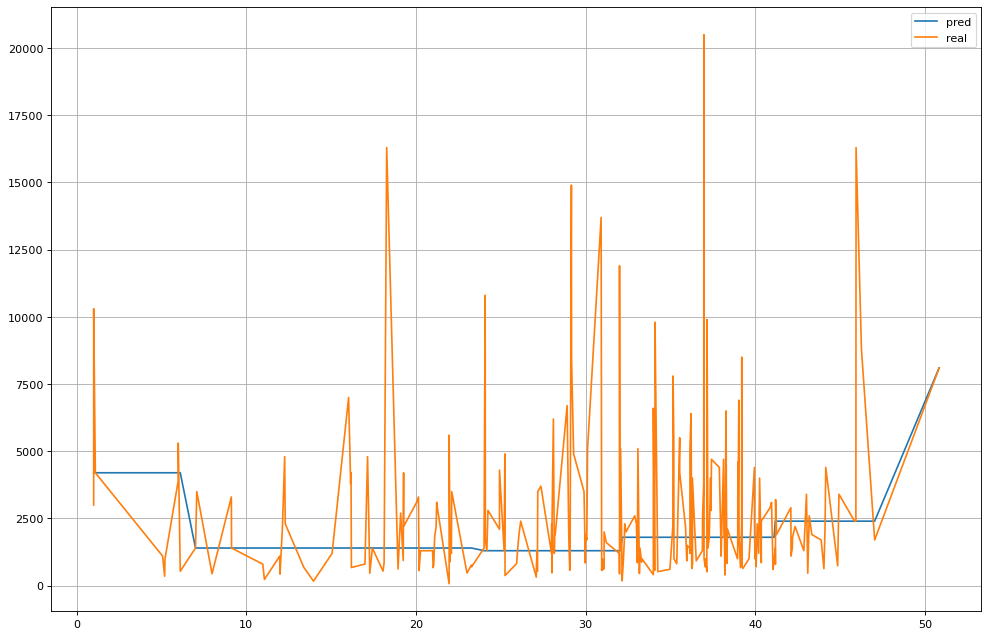

In [9]:
plt.figure(figsize=(15, 10), dpi=80)
plt.plot(X_svd, pred, label='pred')
plt.plot(X_svd, TRlikes, label='real')
plt.legend()
plt.grid()
plt.show()

Se procede a realizar la predicción de datos con los datos reservados previamente para las pruebas.

In [10]:
Xpred = pd.DataFrame([TSwords, TShashtags, TStags, TSfreq]).T

In [11]:
svd = TruncatedSVD(n_components=1, n_iter=7, random_state=42)
Xpred_svd = svd.fit_transform(Xpred) 
var = svd.explained_variance_ratio_
Xpred_svd = pd.DataFrame(data = Xpred_svd)
Xpred_svd = Xpred_svd.sort_values(by=[0]).values

In [12]:
pred = clf.predict(Xpred_svd)

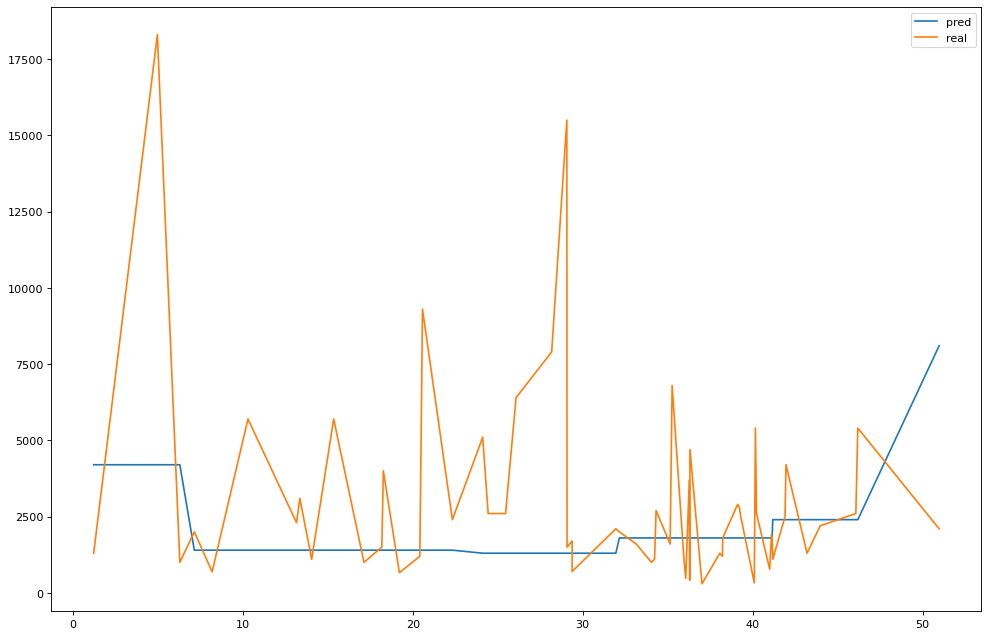

In [13]:
plt.figure(figsize=(15, 10), dpi=80)
plt.plot(Xpred_svd, pred, label='pred')
plt.plot(Xpred_svd, TSlikes, label='real')
plt.legend()
plt.show()

Como se puede ver en la gráfica, la predicción realizada por el algoritmo no es la mejor. Se puede decir que los parámetros de entrada escogidos no son los que definen cuál será la aceptación de la publicación. A continuación se presenta el Error Cuadrado Medio y el Error Absoluto Medio de las predicciones realizadas.

In [14]:
mse = mean_squared_error(TSlikes, pred)
mse

12111560.06557377

In [15]:
mae = mean_absolute_error(TSlikes, pred)
mae

2030.4262295081967

### Simulación sistema de vacunación

In [16]:
import simpy
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Se toma uno de los recintos en la parroquia El Batán de Cuenca. En esta zona hay 12738 personas que deberán votar en uno de los tres Recintos Electorales [1]. Suponiendo que todas las personas se reparten equitativamente en los 3 recintos, en cada recinto se atenderán a 4246 personas. 

<img src="CNE.png" width="800" align="center">

Puesto a que sólo el 80% de la población será vacunada, de las 4246 personas que deberían asistir al recinto, se espera que realmente asistan 3397 personas.

Puesto a que el horario de atención para la vacunación es de 08h00 a 17h00 [2], se define el tiempo de ejecución de la simulación diario en 540 (9 horas en minutos)

In [17]:
TIEMPO = 540
PUNTOS_VACUNACION0 = 6
PUNTOS_VACUNACION = 6
PUNTOS_VACUNACION2 = int(PUNTOS_VACUNACION/2)
DIAS = 100

vacunados1 = []
no_vacunados1 = []

s1 = 0
n1 = 0

vacunados2 = []
no_vacunados2 = []

s2 = 0
n2 = 0

tiempo_espera = []
tiempo = 0

In [18]:
class Centro_Covid(object):
    def __init__(self, env, puntos_vacunacion):
        self.env = env
        self.puntos_vacunacion = simpy.Resource(env, puntos_vacunacion)
        
    def poner_vacuna(self, paciente, dosis):
        global s1
        global s2
        global tiempo
        print('> El %s va a vacunarse a las %.2f. %s' % (paciente, env.now, dosis))
        t = random.randint(5,10)
        tiempo += t
        yield self.env.timeout(t)
        print('> El %s ha sido vacunado a las %.2f. %s' % (paciente, env.now, dosis))
        if '1' in dosis:
            s1+=1
        else:
            s2+=1
    
    def esperar(self, paciente, dosis):
        global tiempo
        print('_  El %s comienza su tiempo de espera a las %.2f. %s' % (paciente, env.now, dosis))
        tiempo += 20
        yield self.env.timeout(20)
        print('_  El %s termina su tiempo de espera a las %.2f. %s' % (paciente, env.now, dosis))
        yield self.env.process(self.certificar(paciente, dosis))
        
    def certificar(self, paciente, dosis):
        global tiempo
        print('@   El %s va a recibir su certificado a las %.2f. %s' % (paciente, env.now, dosis))
        t = random.randint(2,3)
        tiempo += t
        yield self.env.timeout(t)
        print('@   El %s ha recibido su certificado a las %.2f. %s y sale del recinto' % (paciente, env.now, dosis))

In [19]:
def llega_paciente(env, paciente, centro_covid, dosis):
    global n1
    global n2
    print('El %s llega al centro de vacunación a las %.2f. %s' % (paciente, env.now, dosis))
    with centro_covid.puntos_vacunacion.request() as punto_vacunacion:
        if random.randint(1,10) < 9:
            yield punto_vacunacion
            yield env.process(centro_covid.poner_vacuna(paciente, dosis))
            env.process(centro_covid.esperar(paciente, dosis))
        else:
            print('! El %s no ha podido vacunarse la %s y sale del recinto a las %.2f.' % (paciente, dosis, env.now))
            if '1' in dosis:
                n1+=1
            else:
                n2+=1

In [20]:
def ejecutar(env, puntos_vacunacion, dosis):
    centro_covid = Centro_Covid(env, puntos_vacunacion)
    for i in range(PUNTOS_VACUNACION):
        env.process(llega_paciente(env, 'Paciente %d' %(i+1), centro_covid, dosis))
        
    while True:
        yield env.timeout(random.randint(3,15))
        i+=1
        env.process(llega_paciente(env, 'Paciente %d' %(i+1), centro_covid, dosis))

In [21]:
random.seed(88)

for i in range(DIAS):
    print()
    print('------ DÍA ' + str(i+1) + ' ------')
    print()
    
    s1 = 0
    n1 = 0
    s2 = 0
    n2 = 0
    tiempo = 0
    
    env = simpy.Environment()
    if i >= 30:
        if sum(vacunados2) < 3397:
            env.process(ejecutar(env, PUNTOS_VACUNACION, '2da dosis'))
        if sum(vacunados1) < 3397:
            PUNTOS_VACUNACION = PUNTOS_VACUNACION2
        else:
            PUNTOS_VACUNACION = PUNTOS_VACUNACION0
    
    if sum(vacunados1) < 3397:
        env.process(ejecutar(env, PUNTOS_VACUNACION, '1ra dosis'))

        
    env.run(until=TIEMPO)
    
    vacunados1.append(s1)
    no_vacunados1.append(n1)
    vacunados2.append(s2)
    no_vacunados2.append(n2)
    tiempo_espera.append(tiempo)


------ DÍA 1 ------

El Paciente 1 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 2 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 3 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 4 llega al centro de vacunación a las 0.00. 1ra dosis
El Paciente 5 llega al centro de vacunación a las 0.00. 1ra dosis
! El Paciente 5 no ha podido vacunarse la 1ra dosis y sale del recinto a las 0.00.
El Paciente 6 llega al centro de vacunación a las 0.00. 1ra dosis
> El Paciente 1 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 2 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 3 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 4 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 6 va a vacunarse a las 0.00. 1ra dosis
> El Paciente 4 ha sido vacunado a las 6.00. 1ra dosis
> El Paciente 6 ha sido vacunado a las 6.00. 1ra dosis
_  El Paciente 4 comienza su tiempo de espera a las 6.00. 1ra dosis
_  El Paciente 6 comienza su tiempo de espera a las 6.00

@   El Paciente 7 ha recibido su certificado a las 44.00. 1ra dosis y sale del recinto
El Paciente 11 llega al centro de vacunación a las 45.00. 1ra dosis
! El Paciente 11 no ha podido vacunarse la 1ra dosis y sale del recinto a las 45.00.
_  El Paciente 8 termina su tiempo de espera a las 52.00. 1ra dosis
@   El Paciente 8 va a recibir su certificado a las 52.00. 1ra dosis
@   El Paciente 8 ha recibido su certificado a las 55.00. 1ra dosis y sale del recinto
_  El Paciente 9 termina su tiempo de espera a las 59.00. 1ra dosis
@   El Paciente 9 va a recibir su certificado a las 59.00. 1ra dosis
El Paciente 12 llega al centro de vacunación a las 59.00. 1ra dosis
! El Paciente 12 no ha podido vacunarse la 1ra dosis y sale del recinto a las 59.00.
@   El Paciente 9 ha recibido su certificado a las 61.00. 1ra dosis y sale del recinto
El Paciente 13 llega al centro de vacunación a las 73.00. 1ra dosis
> El Paciente 13 va a vacunarse a las 73.00. 1ra dosis
> El Paciente 13 ha sido vacunado a 

El Paciente 28 llega al centro de vacunación a las 229.00. 1ra dosis
> El Paciente 28 va a vacunarse a las 229.00. 1ra dosis
@   El Paciente 26 ha recibido su certificado a las 230.00. 1ra dosis y sale del recinto
El Paciente 29 llega al centro de vacunación a las 239.00. 1ra dosis
! El Paciente 29 no ha podido vacunarse la 1ra dosis y sale del recinto a las 239.00.
> El Paciente 28 ha sido vacunado a las 239.00. 1ra dosis
_  El Paciente 28 comienza su tiempo de espera a las 239.00. 1ra dosis
El Paciente 30 llega al centro de vacunación a las 246.00. 1ra dosis
! El Paciente 30 no ha podido vacunarse la 1ra dosis y sale del recinto a las 246.00.
_  El Paciente 28 termina su tiempo de espera a las 259.00. 1ra dosis
@   El Paciente 28 va a recibir su certificado a las 259.00. 1ra dosis
El Paciente 31 llega al centro de vacunación a las 259.00. 1ra dosis
! El Paciente 31 no ha podido vacunarse la 1ra dosis y sale del recinto a las 259.00.
@   El Paciente 28 ha recibido su certificado a las

@   El Paciente 2 ha recibido su certificado a las 30.00. 1ra dosis y sale del recinto
@   El Paciente 6 ha recibido su certificado a las 32.00. 1ra dosis y sale del recinto
@   El Paciente 1 ha recibido su certificado a las 33.00. 1ra dosis y sale del recinto
@   El Paciente 3 ha recibido su certificado a las 33.00. 1ra dosis y sale del recinto
> El Paciente 8 ha sido vacunado a las 34.00. 1ra dosis
_  El Paciente 8 comienza su tiempo de espera a las 34.00. 1ra dosis
_  El Paciente 7 termina su tiempo de espera a las 39.00. 1ra dosis
@   El Paciente 7 va a recibir su certificado a las 39.00. 1ra dosis
El Paciente 9 llega al centro de vacunación a las 39.00. 1ra dosis
> El Paciente 9 va a vacunarse a las 39.00. 1ra dosis
@   El Paciente 7 ha recibido su certificado a las 41.00. 1ra dosis y sale del recinto
> El Paciente 9 ha sido vacunado a las 46.00. 1ra dosis
_  El Paciente 9 comienza su tiempo de espera a las 46.00. 1ra dosis
El Paciente 10 llega al centro de vacunación a las 51.00.

@   El Paciente 53 va a recibir su certificado a las 452.00. 1ra dosis
El Paciente 56 llega al centro de vacunación a las 455.00. 1ra dosis
@   El Paciente 53 ha recibido su certificado a las 455.00. 1ra dosis y sale del recinto
> El Paciente 56 va a vacunarse a las 455.00. 1ra dosis
_  El Paciente 54 termina su tiempo de espera a las 457.00. 1ra dosis
@   El Paciente 54 va a recibir su certificado a las 457.00. 1ra dosis
El Paciente 57 llega al centro de vacunación a las 458.00. 1ra dosis
> El Paciente 57 va a vacunarse a las 458.00. 1ra dosis
@   El Paciente 54 ha recibido su certificado a las 460.00. 1ra dosis y sale del recinto
> El Paciente 56 ha sido vacunado a las 463.00. 1ra dosis
_  El Paciente 56 comienza su tiempo de espera a las 463.00. 1ra dosis
El Paciente 58 llega al centro de vacunación a las 465.00. 1ra dosis
> El Paciente 58 va a vacunarse a las 465.00. 1ra dosis
> El Paciente 57 ha sido vacunado a las 467.00. 1ra dosis
_  El Paciente 57 comienza su tiempo de espera a

El Paciente 43 llega al centro de vacunación a las 321.00. 1ra dosis
@   El Paciente 38 ha recibido su certificado a las 321.00. 1ra dosis y sale del recinto
> El Paciente 43 va a vacunarse a las 321.00. 1ra dosis
> El Paciente 42 ha sido vacunado a las 324.00. 1ra dosis
_  El Paciente 42 comienza su tiempo de espera a las 324.00. 1ra dosis
> El Paciente 43 ha sido vacunado a las 331.00. 1ra dosis
_  El Paciente 43 comienza su tiempo de espera a las 331.00. 1ra dosis
_  El Paciente 40 termina su tiempo de espera a las 332.00. 1ra dosis
@   El Paciente 40 va a recibir su certificado a las 332.00. 1ra dosis
@   El Paciente 40 ha recibido su certificado a las 334.00. 1ra dosis y sale del recinto
El Paciente 44 llega al centro de vacunación a las 335.00. 1ra dosis
> El Paciente 44 va a vacunarse a las 335.00. 1ra dosis
_  El Paciente 41 termina su tiempo de espera a las 337.00. 1ra dosis
@   El Paciente 41 va a recibir su certificado a las 337.00. 1ra dosis
@   El Paciente 41 ha recibido s

_  El Paciente 3 comienza su tiempo de espera a las 8.00. 1ra dosis
> El Paciente 5 ha sido vacunado a las 9.00. 1ra dosis
_  El Paciente 5 comienza su tiempo de espera a las 9.00. 1ra dosis
> El Paciente 2 ha sido vacunado a las 10.00. 1ra dosis
_  El Paciente 2 comienza su tiempo de espera a las 10.00. 1ra dosis
El Paciente 7 llega al centro de vacunación a las 11.00. 1ra dosis
> El Paciente 7 va a vacunarse a las 11.00. 1ra dosis
> El Paciente 7 ha sido vacunado a las 17.00. 1ra dosis
_  El Paciente 7 comienza su tiempo de espera a las 17.00. 1ra dosis
El Paciente 8 llega al centro de vacunación a las 19.00. 1ra dosis
! El Paciente 8 no ha podido vacunarse la 1ra dosis y sale del recinto a las 19.00.
_  El Paciente 6 termina su tiempo de espera a las 25.00. 1ra dosis
@   El Paciente 6 va a recibir su certificado a las 25.00. 1ra dosis
_  El Paciente 3 termina su tiempo de espera a las 28.00. 1ra dosis
@   El Paciente 3 va a recibir su certificado a las 28.00. 1ra dosis
@   El Pacien

> El Paciente 27 va a vacunarse a las 217.00. 2da dosis
_  El Paciente 24 termina su tiempo de espera a las 218.00. 2da dosis
@   El Paciente 24 va a recibir su certificado a las 218.00. 2da dosis
_  El Paciente 24 termina su tiempo de espera a las 219.00. 1ra dosis
@   El Paciente 24 va a recibir su certificado a las 219.00. 1ra dosis
El Paciente 27 llega al centro de vacunación a las 219.00. 1ra dosis
! El Paciente 27 no ha podido vacunarse la 1ra dosis y sale del recinto a las 219.00.
El Paciente 28 llega al centro de vacunación a las 221.00. 2da dosis
@   El Paciente 24 ha recibido su certificado a las 221.00. 2da dosis y sale del recinto
@   El Paciente 24 ha recibido su certificado a las 221.00. 1ra dosis y sale del recinto
> El Paciente 28 va a vacunarse a las 221.00. 2da dosis
> El Paciente 27 ha sido vacunado a las 223.00. 2da dosis
_  El Paciente 27 comienza su tiempo de espera a las 223.00. 2da dosis
_  El Paciente 25 termina su tiempo de espera a las 227.00. 2da dosis
@   E

> El Paciente 23 ha sido vacunado a las 168.00. 1ra dosis
_  El Paciente 22 comienza su tiempo de espera a las 168.00. 1ra dosis
_  El Paciente 23 comienza su tiempo de espera a las 168.00. 1ra dosis
> El Paciente 20 ha sido vacunado a las 173.00. 2da dosis
_  El Paciente 20 comienza su tiempo de espera a las 173.00. 2da dosis
_  El Paciente 21 termina su tiempo de espera a las 175.00. 1ra dosis
@   El Paciente 21 va a recibir su certificado a las 175.00. 1ra dosis
El Paciente 24 llega al centro de vacunación a las 175.00. 1ra dosis
El Paciente 21 llega al centro de vacunación a las 175.00. 2da dosis
! El Paciente 21 no ha podido vacunarse la 2da dosis y sale del recinto a las 175.00.
> El Paciente 24 va a vacunarse a las 175.00. 1ra dosis
@   El Paciente 21 ha recibido su certificado a las 178.00. 1ra dosis y sale del recinto
> El Paciente 24 ha sido vacunado a las 182.00. 1ra dosis
_  El Paciente 24 comienza su tiempo de espera a las 182.00. 1ra dosis
El Paciente 22 llega al centro d

@   El Paciente 47 va a recibir su certificado a las 419.00. 2da dosis
El Paciente 51 llega al centro de vacunación a las 419.00. 1ra dosis
> El Paciente 51 va a vacunarse a las 419.00. 1ra dosis
El Paciente 50 llega al centro de vacunación a las 420.00. 2da dosis
> El Paciente 50 va a vacunarse a las 420.00. 2da dosis
@   El Paciente 47 ha recibido su certificado a las 422.00. 2da dosis y sale del recinto
El Paciente 52 llega al centro de vacunación a las 422.00. 1ra dosis
> El Paciente 52 va a vacunarse a las 422.00. 1ra dosis
_  El Paciente 49 termina su tiempo de espera a las 425.00. 1ra dosis
@   El Paciente 49 va a recibir su certificado a las 425.00. 1ra dosis
> El Paciente 51 ha sido vacunado a las 425.00. 1ra dosis
_  El Paciente 51 comienza su tiempo de espera a las 425.00. 1ra dosis
_  El Paciente 48 termina su tiempo de espera a las 427.00. 2da dosis
@   El Paciente 48 va a recibir su certificado a las 427.00. 2da dosis
> El Paciente 52 ha sido vacunado a las 427.00. 1ra do

_  El Paciente 21 comienza su tiempo de espera a las 166.00. 2da dosis
_  El Paciente 20 comienza su tiempo de espera a las 166.00. 1ra dosis
El Paciente 21 llega al centro de vacunación a las 168.00. 1ra dosis
! El Paciente 21 no ha podido vacunarse la 1ra dosis y sale del recinto a las 168.00.
@   El Paciente 19 ha recibido su certificado a las 168.00. 2da dosis y sale del recinto
El Paciente 22 llega al centro de vacunación a las 169.00. 2da dosis
> El Paciente 22 va a vacunarse a las 169.00. 2da dosis
_  El Paciente 19 termina su tiempo de espera a las 171.00. 1ra dosis
@   El Paciente 19 va a recibir su certificado a las 171.00. 1ra dosis
_  El Paciente 20 termina su tiempo de espera a las 172.00. 2da dosis
@   El Paciente 20 va a recibir su certificado a las 172.00. 2da dosis
El Paciente 23 llega al centro de vacunación a las 173.00. 2da dosis
@   El Paciente 19 ha recibido su certificado a las 173.00. 1ra dosis y sale del recinto
> El Paciente 23 va a vacunarse a las 173.00. 2da

> El Paciente 48 ha sido vacunado a las 448.00. 1ra dosis
_  El Paciente 48 comienza su tiempo de espera a las 448.00. 1ra dosis
El Paciente 59 llega al centro de vacunación a las 449.00. 2da dosis
> El Paciente 59 va a vacunarse a las 449.00. 2da dosis
> El Paciente 49 ha sido vacunado a las 450.00. 1ra dosis
_  El Paciente 49 comienza su tiempo de espera a las 450.00. 1ra dosis
> El Paciente 58 ha sido vacunado a las 453.00. 2da dosis
El Paciente 50 llega al centro de vacunación a las 453.00. 1ra dosis
_  El Paciente 58 comienza su tiempo de espera a las 453.00. 2da dosis
> El Paciente 50 va a vacunarse a las 453.00. 1ra dosis
_  El Paciente 45 termina su tiempo de espera a las 456.00. 1ra dosis
@   El Paciente 45 va a recibir su certificado a las 456.00. 1ra dosis
_  El Paciente 57 termina su tiempo de espera a las 457.00. 2da dosis
@   El Paciente 57 va a recibir su certificado a las 457.00. 2da dosis
> El Paciente 59 ha sido vacunado a las 457.00. 2da dosis
_  El Paciente 59 comie

> El Paciente 59 ha sido vacunado a las 524.00. 1ra dosis
> El Paciente 64 va a vacunarse a las 524.00. 2da dosis
_  El Paciente 63 comienza su tiempo de espera a las 524.00. 2da dosis
_  El Paciente 59 comienza su tiempo de espera a las 524.00. 1ra dosis
_  El Paciente 61 termina su tiempo de espera a las 528.00. 2da dosis
@   El Paciente 61 va a recibir su certificado a las 528.00. 2da dosis
_  El Paciente 57 termina su tiempo de espera a las 529.00. 1ra dosis
@   El Paciente 57 va a recibir su certificado a las 529.00. 1ra dosis
El Paciente 60 llega al centro de vacunación a las 529.00. 1ra dosis
> El Paciente 60 va a vacunarse a las 529.00. 1ra dosis
@   El Paciente 61 ha recibido su certificado a las 530.00. 2da dosis y sale del recinto
_  El Paciente 62 termina su tiempo de espera a las 531.00. 2da dosis
@   El Paciente 62 va a recibir su certificado a las 531.00. 2da dosis
@   El Paciente 57 ha recibido su certificado a las 532.00. 1ra dosis y sale del recinto
@   El Paciente 62

> El Paciente 25 ha sido vacunado a las 196.00. 1ra dosis
@   El Paciente 23 ha recibido su certificado a las 196.00. 2da dosis y sale del recinto
_  El Paciente 25 comienza su tiempo de espera a las 196.00. 1ra dosis
El Paciente 26 llega al centro de vacunación a las 198.00. 1ra dosis
> El Paciente 26 va a vacunarse a las 198.00. 1ra dosis
El Paciente 26 llega al centro de vacunación a las 199.00. 2da dosis
> El Paciente 26 va a vacunarse a las 199.00. 2da dosis
_  El Paciente 22 termina su tiempo de espera a las 204.00. 1ra dosis
@   El Paciente 22 va a recibir su certificado a las 204.00. 1ra dosis
_  El Paciente 24 termina su tiempo de espera a las 207.00. 2da dosis
@   El Paciente 24 va a recibir su certificado a las 207.00. 2da dosis
El Paciente 27 llega al centro de vacunación a las 207.00. 1ra dosis
> El Paciente 26 ha sido vacunado a las 207.00. 2da dosis
@   El Paciente 22 ha recibido su certificado a las 207.00. 1ra dosis y sale del recinto
> El Paciente 27 va a vacunarse a 

_  El Paciente 34 termina su tiempo de espera a las 313.00. 2da dosis
@   El Paciente 34 va a recibir su certificado a las 313.00. 2da dosis
El Paciente 37 llega al centro de vacunación a las 313.00. 1ra dosis
! El Paciente 37 no ha podido vacunarse la 1ra dosis y sale del recinto a las 313.00.
@   El Paciente 34 ha recibido su certificado a las 315.00. 1ra dosis y sale del recinto
@   El Paciente 34 ha recibido su certificado a las 315.00. 2da dosis y sale del recinto
El Paciente 37 llega al centro de vacunación a las 318.00. 2da dosis
El Paciente 38 llega al centro de vacunación a las 318.00. 1ra dosis
! El Paciente 38 no ha podido vacunarse la 1ra dosis y sale del recinto a las 318.00.
> El Paciente 37 va a vacunarse a las 318.00. 2da dosis
_  El Paciente 35 termina su tiempo de espera a las 323.00. 1ra dosis
@   El Paciente 35 va a recibir su certificado a las 323.00. 1ra dosis
@   El Paciente 35 ha recibido su certificado a las 325.00. 1ra dosis y sale del recinto
El Paciente 38 l

_  El Paciente 50 comienza su tiempo de espera a las 449.00. 2da dosis
El Paciente 53 llega al centro de vacunación a las 450.00. 1ra dosis
> El Paciente 53 va a vacunarse a las 450.00. 1ra dosis
El Paciente 51 llega al centro de vacunación a las 451.00. 2da dosis
@   El Paciente 51 ha recibido su certificado a las 451.00. 1ra dosis y sale del recinto
> El Paciente 51 va a vacunarse a las 451.00. 2da dosis
_  El Paciente 46 termina su tiempo de espera a las 452.00. 2da dosis
@   El Paciente 46 va a recibir su certificado a las 452.00. 2da dosis
_  El Paciente 47 termina su tiempo de espera a las 453.00. 2da dosis
@   El Paciente 47 va a recibir su certificado a las 453.00. 2da dosis
@   El Paciente 46 ha recibido su certificado a las 454.00. 2da dosis y sale del recinto
@   El Paciente 47 ha recibido su certificado a las 455.00. 2da dosis y sale del recinto
El Paciente 54 llega al centro de vacunación a las 458.00. 1ra dosis
> El Paciente 53 ha sido vacunado a las 458.00. 1ra dosis
> E

_  El Paciente 61 termina su tiempo de espera a las 522.00. 2da dosis
@   El Paciente 61 va a recibir su certificado a las 522.00. 2da dosis
_  El Paciente 59 termina su tiempo de espera a las 522.00. 1ra dosis
@   El Paciente 59 va a recibir su certificado a las 522.00. 1ra dosis
@   El Paciente 58 ha recibido su certificado a las 523.00. 1ra dosis y sale del recinto
@   El Paciente 61 ha recibido su certificado a las 524.00. 2da dosis y sale del recinto
@   El Paciente 59 ha recibido su certificado a las 524.00. 1ra dosis y sale del recinto
> El Paciente 63 ha sido vacunado a las 526.00. 2da dosis
_  El Paciente 63 comienza su tiempo de espera a las 526.00. 2da dosis
_  El Paciente 62 termina su tiempo de espera a las 529.00. 2da dosis
@   El Paciente 62 va a recibir su certificado a las 529.00. 2da dosis
El Paciente 64 llega al centro de vacunación a las 530.00. 2da dosis
El Paciente 64 llega al centro de vacunación a las 530.00. 1ra dosis
> El Paciente 64 va a vacunarse a las 530.0

@   El Paciente 21 va a recibir su certificado a las 189.00. 2da dosis
_  El Paciente 19 termina su tiempo de espera a las 190.00. 1ra dosis
@   El Paciente 19 va a recibir su certificado a las 190.00. 1ra dosis
_  El Paciente 22 termina su tiempo de espera a las 191.00. 2da dosis
@   El Paciente 22 va a recibir su certificado a las 191.00. 2da dosis
@   El Paciente 21 ha recibido su certificado a las 191.00. 2da dosis y sale del recinto
> El Paciente 21 ha sido vacunado a las 192.00. 1ra dosis
@   El Paciente 19 ha recibido su certificado a las 192.00. 1ra dosis y sale del recinto
_  El Paciente 21 comienza su tiempo de espera a las 192.00. 1ra dosis
El Paciente 22 llega al centro de vacunación a las 194.00. 1ra dosis
> El Paciente 24 ha sido vacunado a las 194.00. 2da dosis
@   El Paciente 22 ha recibido su certificado a las 194.00. 2da dosis y sale del recinto
> El Paciente 22 va a vacunarse a las 194.00. 1ra dosis
_  El Paciente 24 comienza su tiempo de espera a las 194.00. 2da dos

_  El Paciente 63 comienza su tiempo de espera a las 499.00. 1ra dosis
El Paciente 65 llega al centro de vacunación a las 501.00. 1ra dosis
> El Paciente 65 va a vacunarse a las 501.00. 1ra dosis
> El Paciente 64 ha sido vacunado a las 503.00. 1ra dosis
_  El Paciente 64 comienza su tiempo de espera a las 503.00. 1ra dosis
_  El Paciente 62 termina su tiempo de espera a las 504.00. 1ra dosis
@   El Paciente 62 va a recibir su certificado a las 504.00. 1ra dosis
El Paciente 56 llega al centro de vacunación a las 504.00. 2da dosis
> El Paciente 56 va a vacunarse a las 504.00. 2da dosis
@   El Paciente 62 ha recibido su certificado a las 507.00. 1ra dosis y sale del recinto
> El Paciente 65 ha sido vacunado a las 509.00. 1ra dosis
_  El Paciente 65 comienza su tiempo de espera a las 509.00. 1ra dosis
El Paciente 66 llega al centro de vacunación a las 510.00. 1ra dosis
> El Paciente 56 ha sido vacunado a las 510.00. 2da dosis
> El Paciente 66 va a vacunarse a las 510.00. 1ra dosis
_  El Pa

> El Paciente 24 va a vacunarse a las 189.00. 1ra dosis
> El Paciente 23 ha sido vacunado a las 190.00. 1ra dosis
_  El Paciente 23 comienza su tiempo de espera a las 190.00. 1ra dosis
El Paciente 25 llega al centro de vacunación a las 192.00. 1ra dosis
> El Paciente 25 va a vacunarse a las 192.00. 1ra dosis
> El Paciente 23 ha sido vacunado a las 193.00. 2da dosis
_  El Paciente 23 comienza su tiempo de espera a las 193.00. 2da dosis
> El Paciente 24 ha sido vacunado a las 199.00. 1ra dosis
_  El Paciente 24 comienza su tiempo de espera a las 199.00. 1ra dosis
_  El Paciente 21 termina su tiempo de espera a las 200.00. 2da dosis
@   El Paciente 21 va a recibir su certificado a las 200.00. 2da dosis
El Paciente 24 llega al centro de vacunación a las 201.00. 2da dosis
> El Paciente 24 va a vacunarse a las 201.00. 2da dosis
> El Paciente 25 ha sido vacunado a las 202.00. 1ra dosis
_  El Paciente 25 comienza su tiempo de espera a las 202.00. 1ra dosis
_  El Paciente 22 termina su tiempo d

> El Paciente 21 va a vacunarse a las 139.00. 1ra dosis
> El Paciente 18 va a vacunarse a las 139.00. 2da dosis
_  El Paciente 17 comienza su tiempo de espera a las 139.00. 2da dosis
_  El Paciente 17 termina su tiempo de espera a las 142.00. 1ra dosis
@   El Paciente 17 va a recibir su certificado a las 142.00. 1ra dosis
@   El Paciente 17 ha recibido su certificado a las 145.00. 1ra dosis y sale del recinto
_  El Paciente 18 termina su tiempo de espera a las 147.00. 1ra dosis
@   El Paciente 18 va a recibir su certificado a las 147.00. 1ra dosis
> El Paciente 21 ha sido vacunado a las 148.00. 1ra dosis
_  El Paciente 21 comienza su tiempo de espera a las 148.00. 1ra dosis
> El Paciente 18 ha sido vacunado a las 149.00. 2da dosis
_  El Paciente 18 comienza su tiempo de espera a las 149.00. 2da dosis
El Paciente 22 llega al centro de vacunación a las 150.00. 1ra dosis
El Paciente 19 llega al centro de vacunación a las 150.00. 2da dosis
@   El Paciente 18 ha recibido su certificado a la

@   El Paciente 9 va a recibir su certificado a las 82.00. 2da dosis
El Paciente 13 llega al centro de vacunación a las 82.00. 2da dosis
! El Paciente 13 no ha podido vacunarse la 2da dosis y sale del recinto a las 82.00.
@   El Paciente 8 ha recibido su certificado a las 82.00. 2da dosis y sale del recinto
> El Paciente 12 ha sido vacunado a las 83.00. 2da dosis
@   El Paciente 9 ha recibido su certificado a las 83.00. 1ra dosis y sale del recinto
_  El Paciente 12 comienza su tiempo de espera a las 83.00. 2da dosis
@   El Paciente 9 ha recibido su certificado a las 84.00. 2da dosis y sale del recinto
El Paciente 13 llega al centro de vacunación a las 88.00. 1ra dosis
> El Paciente 13 va a vacunarse a las 88.00. 1ra dosis
_  El Paciente 10 termina su tiempo de espera a las 90.00. 1ra dosis
@   El Paciente 10 va a recibir su certificado a las 90.00. 1ra dosis
_  El Paciente 11 termina su tiempo de espera a las 91.00. 1ra dosis
@   El Paciente 11 va a recibir su certificado a las 91.00.

! El Paciente 28 no ha podido vacunarse la 1ra dosis y sale del recinto a las 217.00.
@   El Paciente 23 ha recibido su certificado a las 217.00. 2da dosis y sale del recinto
_  El Paciente 25 termina su tiempo de espera a las 218.00. 1ra dosis
@   El Paciente 25 va a recibir su certificado a las 218.00. 1ra dosis
El Paciente 26 llega al centro de vacunación a las 220.00. 2da dosis
@   El Paciente 25 ha recibido su certificado a las 220.00. 1ra dosis y sale del recinto
> El Paciente 26 va a vacunarse a las 220.00. 2da dosis
_  El Paciente 26 termina su tiempo de espera a las 223.00. 1ra dosis
@   El Paciente 26 va a recibir su certificado a las 223.00. 1ra dosis
El Paciente 29 llega al centro de vacunación a las 225.00. 1ra dosis
> El Paciente 29 va a vacunarse a las 225.00. 1ra dosis
@   El Paciente 26 ha recibido su certificado a las 226.00. 1ra dosis y sale del recinto
_  El Paciente 24 termina su tiempo de espera a las 228.00. 2da dosis
@   El Paciente 24 va a recibir su certificad

> El Paciente 42 va a vacunarse a las 381.00. 1ra dosis
_  El Paciente 41 termina su tiempo de espera a las 385.00. 2da dosis
@   El Paciente 41 va a recibir su certificado a las 385.00. 2da dosis
_  El Paciente 42 termina su tiempo de espera a las 388.00. 2da dosis
@   El Paciente 42 va a recibir su certificado a las 388.00. 2da dosis
@   El Paciente 41 ha recibido su certificado a las 388.00. 2da dosis y sale del recinto
_  El Paciente 40 termina su tiempo de espera a las 390.00. 1ra dosis
@   El Paciente 40 va a recibir su certificado a las 390.00. 1ra dosis
> El Paciente 42 ha sido vacunado a las 390.00. 1ra dosis
@   El Paciente 42 ha recibido su certificado a las 390.00. 2da dosis y sale del recinto
_  El Paciente 42 comienza su tiempo de espera a las 390.00. 1ra dosis
El Paciente 45 llega al centro de vacunación a las 391.00. 2da dosis
! El Paciente 45 no ha podido vacunarse la 2da dosis y sale del recinto a las 391.00.
@   El Paciente 40 ha recibido su certificado a las 392.00.

> El Paciente 12 ha sido vacunado a las 69.00. 2da dosis
_  El Paciente 12 comienza su tiempo de espera a las 69.00. 2da dosis
_  El Paciente 11 termina su tiempo de espera a las 71.00. 2da dosis
@   El Paciente 11 va a recibir su certificado a las 71.00. 2da dosis
@   El Paciente 10 ha recibido su certificado a las 71.00. 2da dosis y sale del recinto
El Paciente 13 llega al centro de vacunación a las 73.00. 2da dosis
> El Paciente 13 va a vacunarse a las 73.00. 2da dosis
@   El Paciente 11 ha recibido su certificado a las 74.00. 2da dosis y sale del recinto
El Paciente 14 llega al centro de vacunación a las 76.00. 2da dosis
> El Paciente 14 va a vacunarse a las 76.00. 2da dosis
> El Paciente 13 ha sido vacunado a las 83.00. 2da dosis
_  El Paciente 13 comienza su tiempo de espera a las 83.00. 2da dosis
> El Paciente 14 ha sido vacunado a las 84.00. 2da dosis
_  El Paciente 14 comienza su tiempo de espera a las 84.00. 2da dosis
El Paciente 15 llega al centro de vacunación a las 88.00. 

_  El Paciente 20 termina su tiempo de espera a las 138.00. 2da dosis
@   El Paciente 20 va a recibir su certificado a las 138.00. 2da dosis
@   El Paciente 20 ha recibido su certificado a las 140.00. 2da dosis y sale del recinto
> El Paciente 22 ha sido vacunado a las 141.00. 2da dosis
@   El Paciente 19 ha recibido su certificado a las 141.00. 2da dosis y sale del recinto
_  El Paciente 22 comienza su tiempo de espera a las 141.00. 2da dosis
El Paciente 23 llega al centro de vacunación a las 149.00. 2da dosis
> El Paciente 23 va a vacunarse a las 149.00. 2da dosis
_  El Paciente 21 termina su tiempo de espera a las 152.00. 2da dosis
@   El Paciente 21 va a recibir su certificado a las 152.00. 2da dosis
@   El Paciente 21 ha recibido su certificado a las 154.00. 2da dosis y sale del recinto
El Paciente 24 llega al centro de vacunación a las 155.00. 2da dosis
> El Paciente 23 ha sido vacunado a las 155.00. 2da dosis
> El Paciente 24 va a vacunarse a las 155.00. 2da dosis
_  El Paciente

El Paciente 8 llega al centro de vacunación a las 23.00. 2da dosis
> El Paciente 8 va a vacunarse a las 23.00. 2da dosis
_  El Paciente 3 termina su tiempo de espera a las 25.00. 2da dosis
@   El Paciente 3 va a recibir su certificado a las 25.00. 2da dosis
_  El Paciente 5 termina su tiempo de espera a las 25.00. 2da dosis
@   El Paciente 5 va a recibir su certificado a las 25.00. 2da dosis
@   El Paciente 3 ha recibido su certificado a las 27.00. 2da dosis y sale del recinto
@   El Paciente 5 ha recibido su certificado a las 27.00. 2da dosis y sale del recinto
El Paciente 9 llega al centro de vacunación a las 28.00. 2da dosis
> El Paciente 9 va a vacunarse a las 28.00. 2da dosis
> El Paciente 8 ha sido vacunado a las 33.00. 2da dosis
_  El Paciente 8 comienza su tiempo de espera a las 33.00. 2da dosis
> El Paciente 9 ha sido vacunado a las 37.00. 2da dosis
_  El Paciente 9 comienza su tiempo de espera a las 37.00. 2da dosis
El Paciente 10 llega al centro de vacunación a las 41.00. 2d

_  El Paciente 11 comienza su tiempo de espera a las 51.00. 2da dosis
_  El Paciente 9 termina su tiempo de espera a las 52.00. 2da dosis
@   El Paciente 9 va a recibir su certificado a las 52.00. 2da dosis
@   El Paciente 9 ha recibido su certificado a las 54.00. 2da dosis y sale del recinto
_  El Paciente 10 termina su tiempo de espera a las 55.00. 2da dosis
@   El Paciente 10 va a recibir su certificado a las 55.00. 2da dosis
> El Paciente 12 ha sido vacunado a las 55.00. 2da dosis
_  El Paciente 12 comienza su tiempo de espera a las 55.00. 2da dosis
El Paciente 13 llega al centro de vacunación a las 56.00. 2da dosis
! El Paciente 13 no ha podido vacunarse la 2da dosis y sale del recinto a las 56.00.
@   El Paciente 10 ha recibido su certificado a las 57.00. 2da dosis y sale del recinto
El Paciente 14 llega al centro de vacunación a las 69.00. 2da dosis
! El Paciente 14 no ha podido vacunarse la 2da dosis y sale del recinto a las 69.00.
_  El Paciente 11 termina su tiempo de espera 

> El Paciente 14 ha sido vacunado a las 89.00. 2da dosis
_  El Paciente 14 comienza su tiempo de espera a las 89.00. 2da dosis
_  El Paciente 12 termina su tiempo de espera a las 92.00. 2da dosis
@   El Paciente 12 va a recibir su certificado a las 92.00. 2da dosis
El Paciente 15 llega al centro de vacunación a las 94.00. 2da dosis
@   El Paciente 12 ha recibido su certificado a las 94.00. 2da dosis y sale del recinto
> El Paciente 15 va a vacunarse a las 94.00. 2da dosis
El Paciente 16 llega al centro de vacunación a las 98.00. 2da dosis
> El Paciente 16 va a vacunarse a las 98.00. 2da dosis
> El Paciente 15 ha sido vacunado a las 101.00. 2da dosis
_  El Paciente 15 comienza su tiempo de espera a las 101.00. 2da dosis
El Paciente 17 llega al centro de vacunación a las 106.00. 2da dosis
> El Paciente 17 va a vacunarse a las 106.00. 2da dosis
> El Paciente 16 ha sido vacunado a las 108.00. 2da dosis
_  El Paciente 16 comienza su tiempo de espera a las 108.00. 2da dosis
_  El Paciente 14

El Paciente 58 llega al centro de vacunación a las 464.00. 2da dosis
! El Paciente 58 no ha podido vacunarse la 2da dosis y sale del recinto a las 464.00.
El Paciente 59 llega al centro de vacunación a las 475.00. 2da dosis
! El Paciente 59 no ha podido vacunarse la 2da dosis y sale del recinto a las 475.00.
_  El Paciente 56 termina su tiempo de espera a las 480.00. 2da dosis
@   El Paciente 56 va a recibir su certificado a las 480.00. 2da dosis
_  El Paciente 57 termina su tiempo de espera a las 483.00. 2da dosis
@   El Paciente 57 va a recibir su certificado a las 483.00. 2da dosis
@   El Paciente 56 ha recibido su certificado a las 483.00. 2da dosis y sale del recinto
@   El Paciente 57 ha recibido su certificado a las 486.00. 2da dosis y sale del recinto
El Paciente 60 llega al centro de vacunación a las 489.00. 2da dosis
> El Paciente 60 va a vacunarse a las 489.00. 2da dosis
El Paciente 61 llega al centro de vacunación a las 497.00. 2da dosis
! El Paciente 61 no ha podido vacuna

@   El Paciente 3 va a recibir su certificado a las 28.00. 2da dosis
_  El Paciente 2 termina su tiempo de espera a las 29.00. 2da dosis
@   El Paciente 2 va a recibir su certificado a las 29.00. 2da dosis
@   El Paciente 1 ha recibido su certificado a las 30.00. 2da dosis y sale del recinto
@   El Paciente 5 ha recibido su certificado a las 30.00. 2da dosis y sale del recinto
@   El Paciente 3 ha recibido su certificado a las 31.00. 2da dosis y sale del recinto
@   El Paciente 2 ha recibido su certificado a las 32.00. 2da dosis y sale del recinto
El Paciente 11 llega al centro de vacunación a las 39.00. 2da dosis
> El Paciente 11 va a vacunarse a las 39.00. 2da dosis
_  El Paciente 9 termina su tiempo de espera a las 45.00. 2da dosis
@   El Paciente 9 va a recibir su certificado a las 45.00. 2da dosis
@   El Paciente 9 ha recibido su certificado a las 48.00. 2da dosis y sale del recinto
> El Paciente 11 ha sido vacunado a las 49.00. 2da dosis
_  El Paciente 11 comienza su tiempo de es

<ipython-input-22-b5f5938cecb0>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


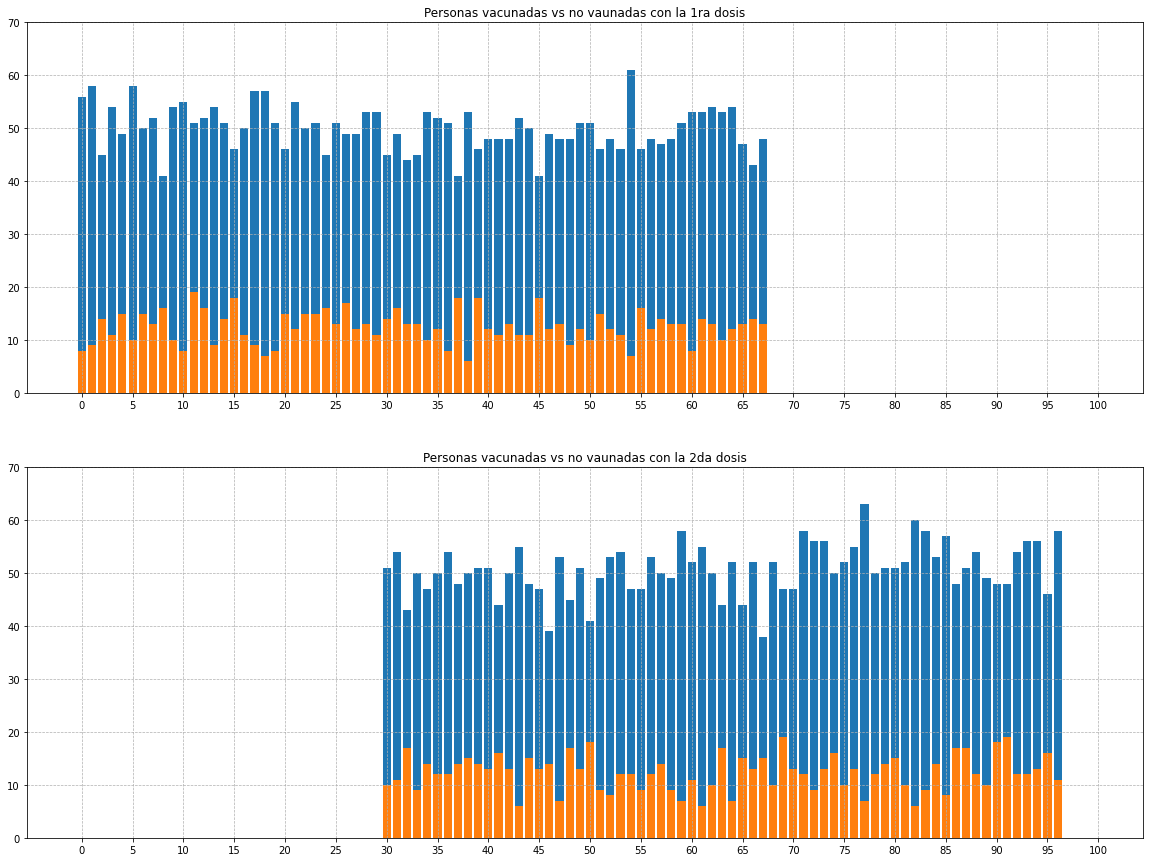

In [22]:
x = np.arange(len(vacunados1))
fig, (ax1, ax2) = plt.subplots(2, figsize=(20,15))
ax1.set_title('Personas vacunadas vs no vaunadas con la 1ra dosis')
ax1.bar(x, vacunados1)
ax1.bar(x, no_vacunados1)
ax1.grid(linestyle='--', linewidth=0.7)
ax1.set_xticks(np.arange(0,101,5))
ax1.set_yticks(np.arange(0, 71, 10))

ax2.set_title('Personas vacunadas vs no vaunadas con la 2da dosis')
ax2.bar(x, vacunados2)
ax2.bar(x, no_vacunados2)
ax2.grid(linestyle='--', linewidth=0.7)
ax2.set_xticks(np.arange(0,101,5))
ax2.set_yticks(np.arange(0, 71, 10))
fig.show()

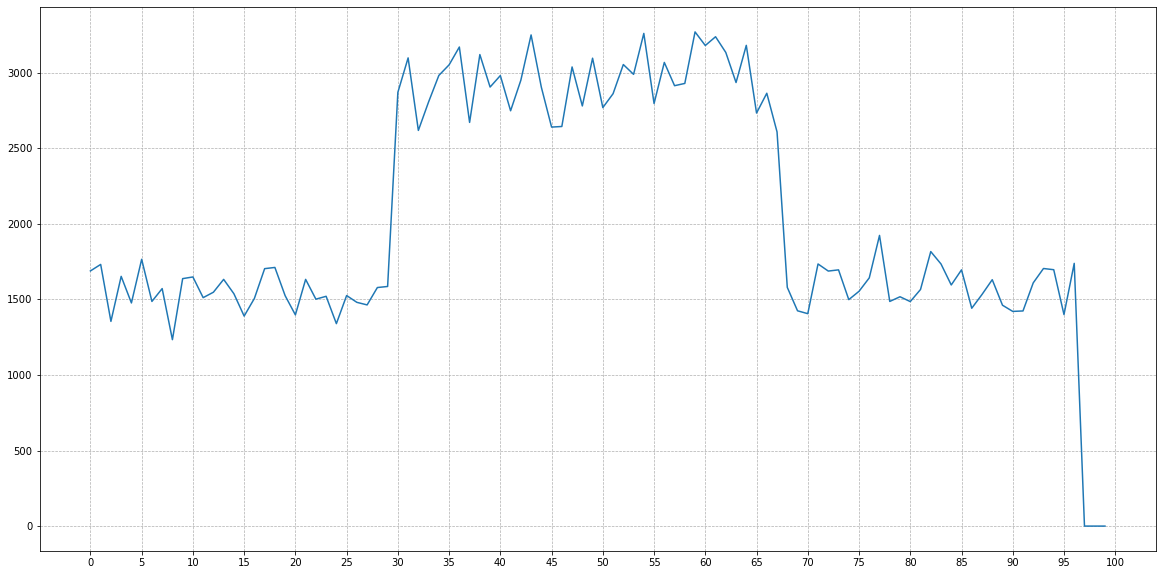

In [23]:
plt.figure(figsize=(20,10))
plt.xticks(np.arange(0,101,5))
plt.grid(linestyle='--', linewidth=0.7)
plt.plot(np.arange(len(tiempo_espera)), tiempo_espera)
plt.show()

[1] http://portal.cne.gob.ec/documents/Estadisticas/cne_registro_electoral.pdf

[2] https://www.primicias.ec/noticias/sociedad/adultos-mayores-segunda-dosis/